# Handling Data Redundancy
Data redundancy is typically addressed during data cleaning and preprocessing stages, which involves:

* Feature selection: Identifying and removing irrelevant or redundant features.
* Data normalization: Scaling features to a common range.
* Dimensionality reduction: Reducing the number of features while preserving information (e.g., PCA).

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv("/kaggle/input/titanic-machine-learning-from-disaster/train.csv")

In [16]:
print(data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# Understanding Missing Values
Missing values, often represented as NaN (Not a Number) in Python, can significantly impact data analysis

In [17]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [18]:
data_dropped_all = data.dropna()


In [19]:
data_dropped_all_nan = data.dropna(how='all')


In [20]:
data_dropped_thresh = data.dropna(thresh=len(data.columns) - 2)


In [21]:
data_dropped_column = data.dropna(subset=['Age'])


In [22]:
data_filled_zero = data.fillna(0)


In [23]:
data_filled_mean = data.fillna(data.mean())
data_filled_median = data.fillna(data.median())


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [29]:
data.fillna(data['Age'].mean(), inplace=True)

In [30]:
duplicates = data[data.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [31]:
data_without_duplicates = data.drop_duplicates()


* The best method for handling missing values depends on the data, the analysis goal, and the amount of missing data.
* Imputation can introduce bias, so it's essential to consider the impact on your analysis.
* Domain knowledge is crucial for making informed decisions about missing value handling for example this is data set if for titanic accident.
* For large datasets,we can consider using more advanced imputation techniques like KNN imputation or iterative imputation.

# Vistualisation after Cleaning Part- 2 

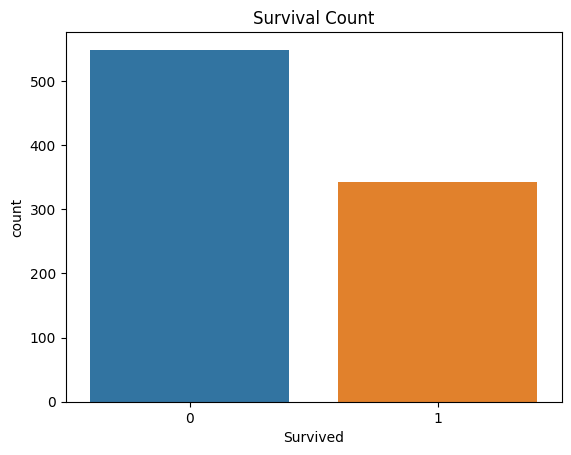

In [32]:
sns.countplot(x='Survived', data=data)
plt.title("Survival Count")
plt.show()


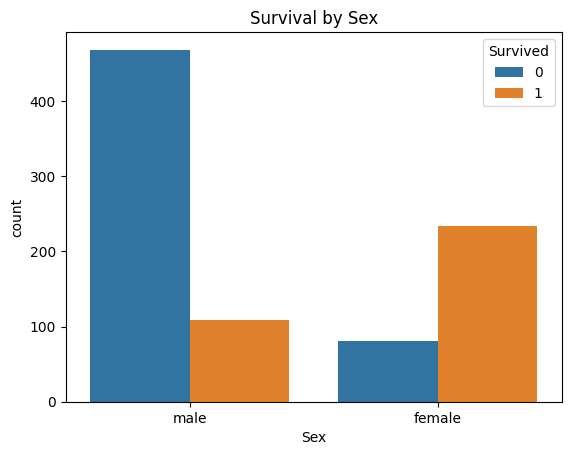

In [33]:
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title("Survival by Sex")
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


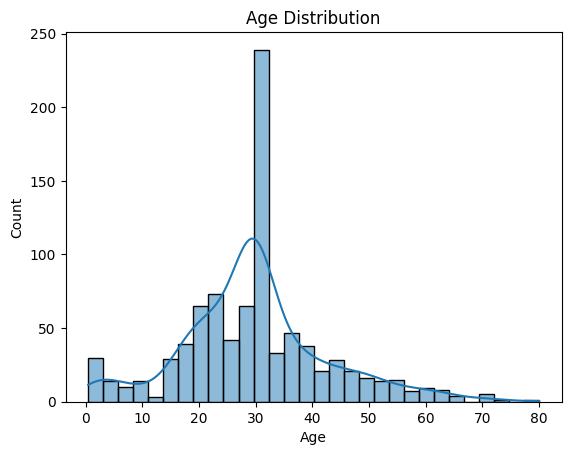

In [34]:
sns.histplot(data['Age'], kde=True)
plt.title("Age Distribution")
plt.show()
